# Exploratory Data Analysis

Analysis of Boston 311 Service Request data (2019-2024)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_parquet('../data/raw/311_2019_2024.parquet')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1609901, 9)


,open_dt,case_title,subject,reason,type,neighborhood,latitude,longitude,year
0,2019-01-01 00:03:00,PRINTED : Knocked down/Eric Huynh,Public Works Department,Street Lights,Street Light Knock Downs,Roxbury,42.311989543542985,-71.07318058393646,2019
1,2019-01-01 00:17:00,Fire Hydrant,Boston Water & Sewer Commission,Fire Hydrant,Fire Hydrant,Back Bay,42.35555543069734,-71.07204905095969,2019
2,2019-01-01 00:31:51,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,Boston,42.36275473010927,-71.06918487934533,2019
3,2019-01-01 00:42:00,Police: Full Notifications,Mayor's 24 Hour Hotline,Notification,Notification,Dorchester,42.30892953549676,-71.06696057692697,2019
4,2019-01-01 01:09:12,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,East Boston,42.380799484620454,-71.03197033762936,2019


## Data Overview

In [2]:
print("Data Types:")
print(df.dtypes)
print("\nMemory Usage:")
print(df.memory_usage(deep=True) / 1024**2, "MB")

Data Types:
open_dt         object
case_title      object
subject         object
reason          object
type            object
neighborhood    object
latitude        object
longitude       object
year             int64
dtype: object

Memory Usage:
Index             0.000126
open_dt         116.684414
case_title      122.732586
subject         127.037288
reason          115.225308
type            122.970301
neighborhood    109.807718
latitude        113.353580
longitude       114.310165
year             12.282570
dtype: float64 MB


In [3]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

              Missing Count  Percentage
latitude              12287    0.763215
longitude             12287    0.763215
neighborhood           1448    0.089943
case_title              101    0.006274


Seems to be a lot of missing data in terms of neighborhoods. It is best to filter those rows out during preprocessing.

## Temporal Analysis

In [4]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['date'] = df['open_dt'].dt.date
df['year_month'] = df['open_dt'].dt.to_period('M')
df['day_of_week'] = df['open_dt'].dt.day_name()
df['hour'] = df['open_dt'].dt.hour

print(f"Date range: {df['open_dt'].min()} to {df['open_dt'].max()}")

Date range: 2019-01-01 00:03:00 to 2024-12-31 23:55:16


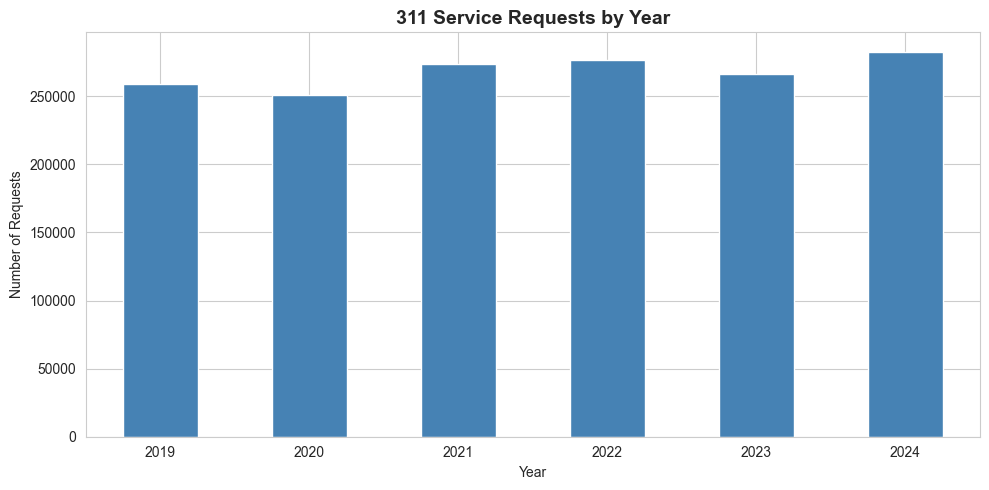


Requests per year:
year
2019    259022
2020    251222
2021    273784
2022    276599
2023    266438
2024    282836
Name: count, dtype: int64


In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
year_counts = df['year'].value_counts().sort_index()
year_counts.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('311 Service Requests by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nRequests per year:")
print(year_counts)

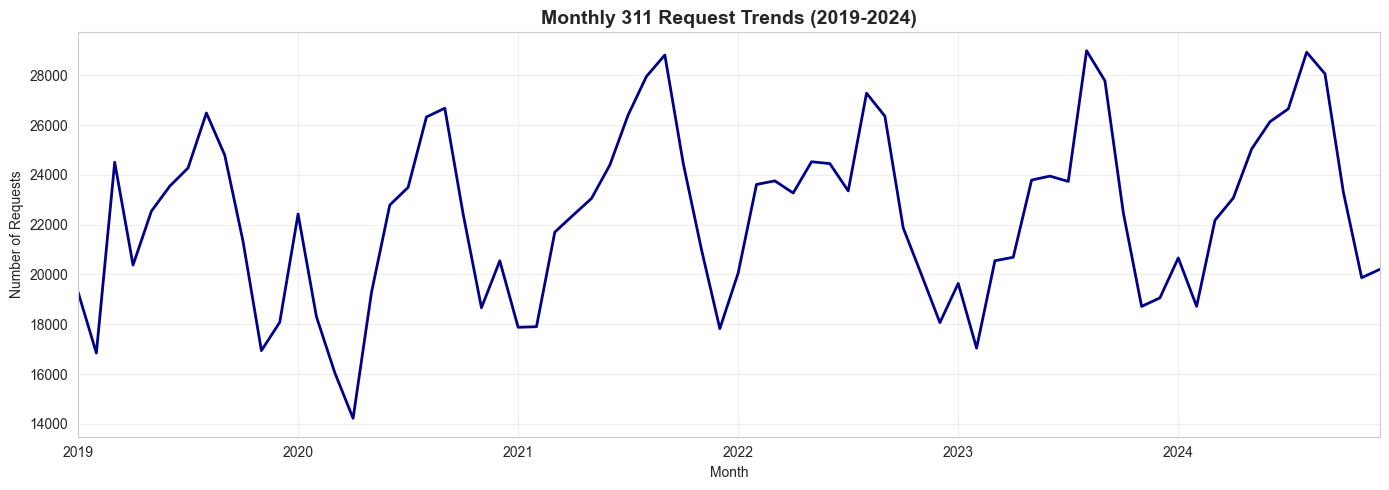

In [6]:
monthly_counts = df.groupby('year_month').size()
fig, ax = plt.subplots(figsize=(14, 5))
monthly_counts.plot(ax=ax, linewidth=2, color='darkblue')
ax.set_title('Monthly 311 Request Trends (2019-2024)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Requests')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

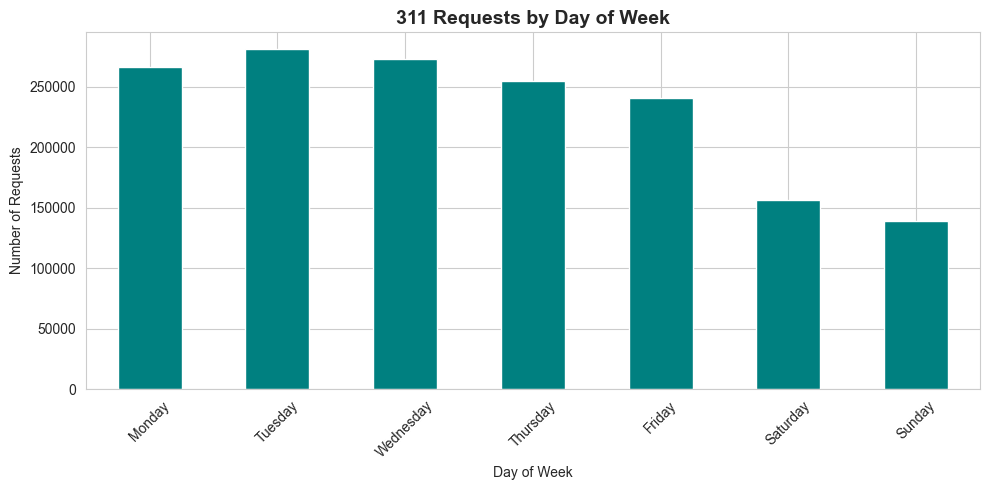

In [7]:
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['day_of_week'].value_counts().reindex(dow_order)

fig, ax = plt.subplots(figsize=(10, 5))
dow_counts.plot(kind='bar', ax=ax, color='teal')
ax.set_title('311 Requests by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

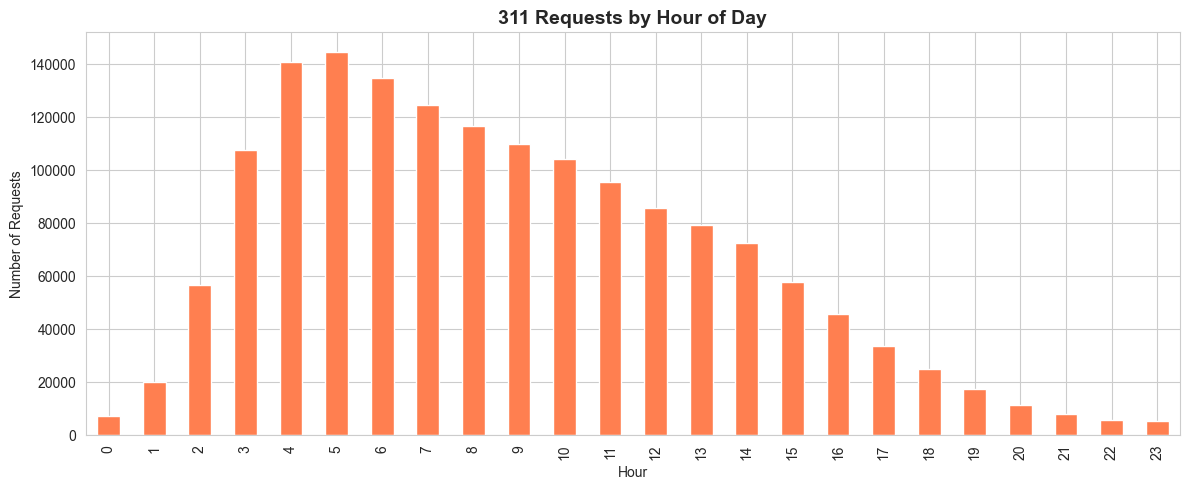

In [8]:
hourly_counts = df['hour'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 5))
hourly_counts.plot(kind='bar', ax=ax, color='coral')
ax.set_title('311 Requests by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Requests')
plt.tight_layout()
plt.show()

## Request Type Analysis

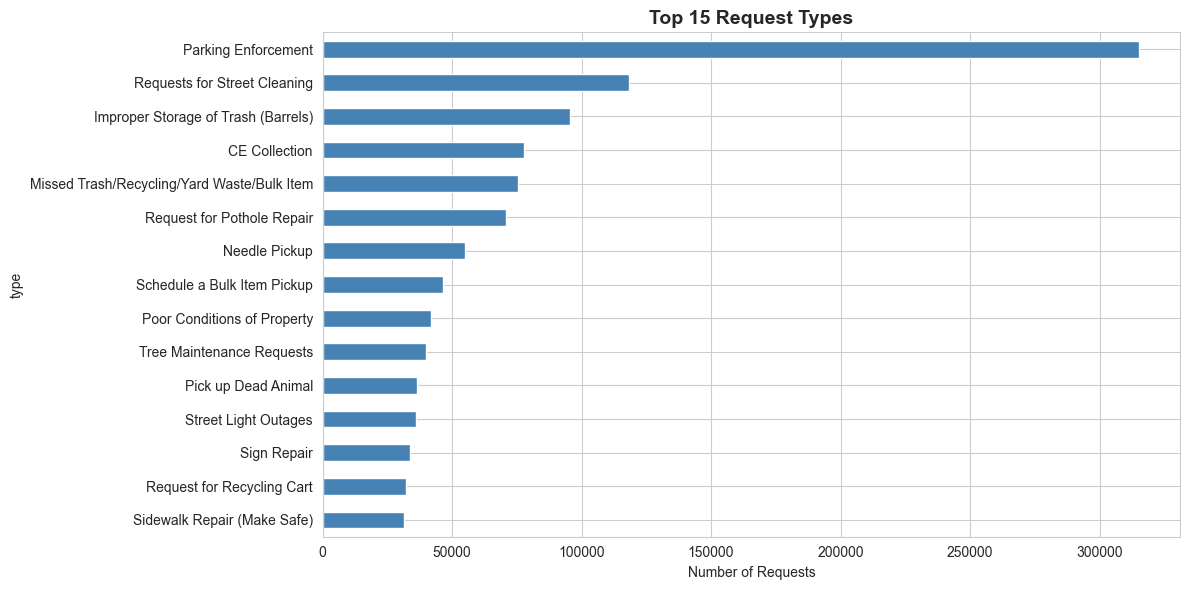


Top 15 request types:
type
Parking Enforcement                            315298
Requests for Street Cleaning                   118433
Improper Storage of Trash (Barrels)             95367
CE Collection                                   77653
Missed Trash/Recycling/Yard Waste/Bulk Item     75501
Request for Pothole Repair                      70873
Needle Pickup                                   55040
Schedule a Bulk Item Pickup                     46485
Poor Conditions of Property                     41894
Tree Maintenance Requests                       39957
Pick up Dead Animal                             36553
Street Light Outages                            35911
Sign Repair                                     33710
Request for Recycling Cart                      32233
Sidewalk Repair (Make Safe)                     31597
Name: count, dtype: int64


In [9]:
top_types = df['type'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 6))
top_types.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Top 15 Request Types', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Requests')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 15 request types:")
print(top_types)

In [10]:
print("Unique subjects:", df['subject'].nunique())
print("\nTop 10 subjects:")
print(df['subject'].value_counts().head(10))

Unique subjects: 11

Top 10 subjects:
subject
Public Works Department              825704
Transportation - Traffic Division    422460
Inspectional Services                119584
Parks & Recreation Department        106946
Mayor's 24 Hour Hotline               80454
Animal Control                        23209
Property Management                   18918
Boston Water & Sewer Commission        8743
Boston Police Department               3640
Neighborhood Services                   169
Name: count, dtype: int64


In [11]:
print("Unique reasons:", df['reason'].nunique())
print("\nTop 10 reasons:")
print(df['reason'].value_counts().head(10))

Unique reasons: 48

Top 10 reasons:
reason
Enforcement & Abandoned Vehicles    344846
Street Cleaning                     239042
Code Enforcement                    175720
Sanitation                          144366
Highway Maintenance                 143982
Signs & Signals                      69038
Recycling                            67315
Trees                                60106
Needle Program                       55040
Street Lights                        49836
Name: count, dtype: int64


## Geographic Analysis

Unique neighborhoods: 24


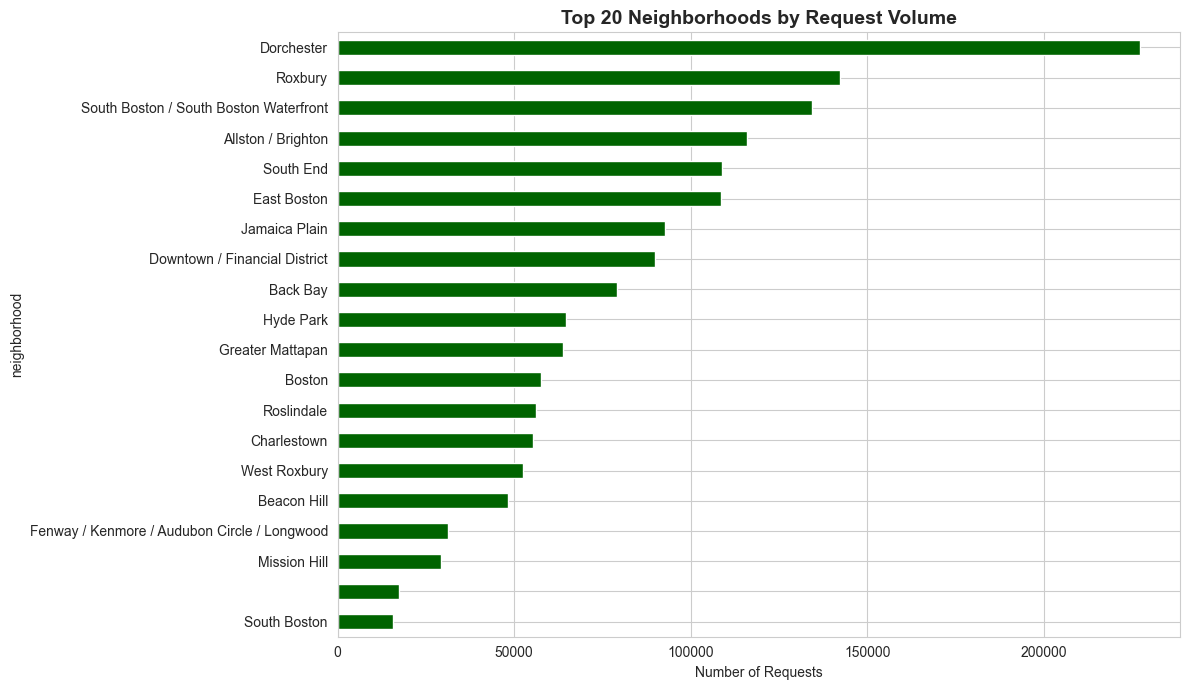


Top 20 neighborhoods:
neighborhood
Dorchester                                      227247
Roxbury                                         142341
South Boston / South Boston Waterfront          134253
Allston / Brighton                              115919
South End                                       108938
East Boston                                     108558
Jamaica Plain                                    92683
Downtown / Financial District                    90021
Back Bay                                         79067
Hyde Park                                        64683
Greater Mattapan                                 63773
Boston                                           57723
Roslindale                                       56057
Charlestown                                      55307
West Roxbury                                     52630
Beacon Hill                                      48225
Fenway / Kenmore / Audubon Circle / Longwood     31214
Mission Hill                 

In [12]:
print("Unique neighborhoods:", df['neighborhood'].nunique())
top_neighborhoods = df['neighborhood'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(12, 7))
top_neighborhoods.plot(kind='barh', ax=ax, color='darkgreen')
ax.set_title('Top 20 Neighborhoods by Request Volume', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Requests')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 20 neighborhoods:")
print(top_neighborhoods)

In [13]:
df_with_coords = df[df['latitude'].notna() & df['longitude'].notna()].copy()
df_with_coords['latitude'] = pd.to_numeric(df_with_coords['latitude'], errors='coerce')
df_with_coords['longitude'] = pd.to_numeric(df_with_coords['longitude'], errors='coerce')

print(f"Records with valid coordinates: {len(df_with_coords):,}")
print(f"Percentage with coordinates: {len(df_with_coords)/len(df)*100:.2f}%")
print(f"\nLatitude range: {df_with_coords['latitude'].min():.4f} to {df_with_coords['latitude'].max():.4f}")
print(f"Longitude range: {df_with_coords['longitude'].min():.4f} to {df_with_coords['longitude'].max():.4f}")

Records with valid coordinates: 1,597,614
Percentage with coordinates: 99.24%

Latitude range: -71.1358 to 42.3990
Longitude range: -71.1907 to 42.3585


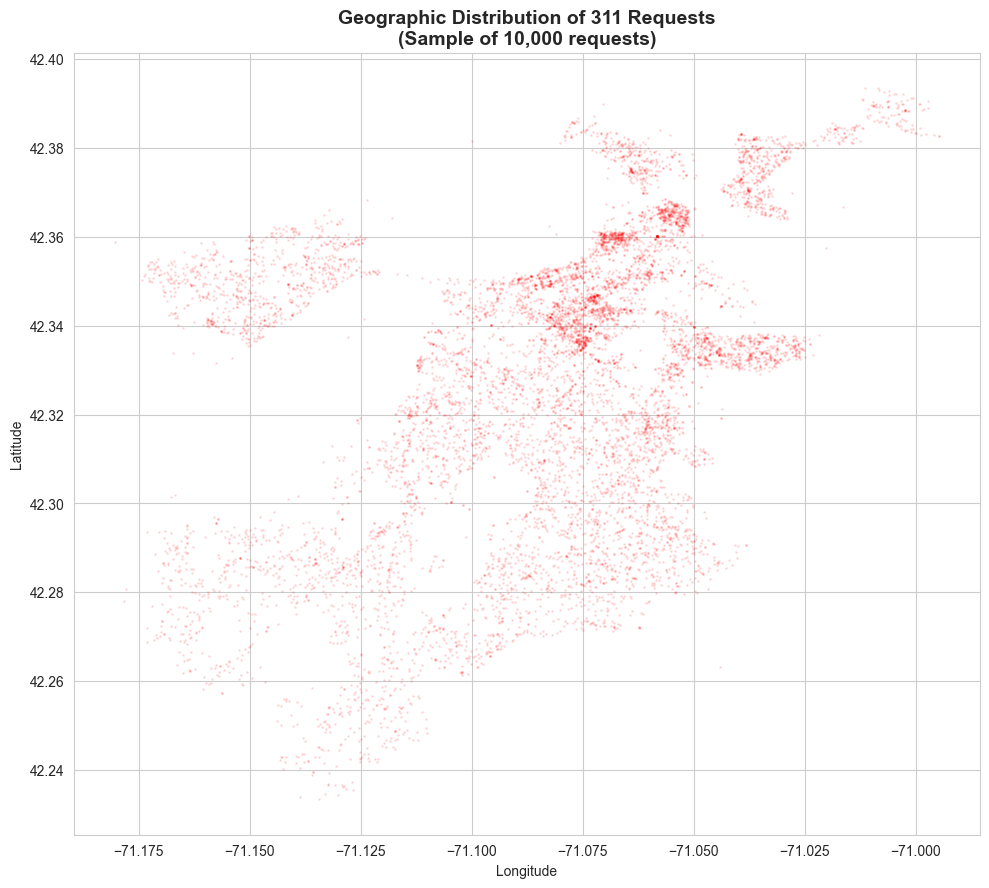

In [14]:
sample_size = min(10000, len(df_with_coords))
df_sample = df_with_coords.sample(sample_size, random_state=42)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_sample['longitude'], df_sample['latitude'], 
           alpha=0.1, s=1, color='red')
ax.set_title(f'Geographic Distribution of 311 Requests\n(Sample of {sample_size:,} requests)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

## Summary Statistics

In [15]:
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
min_date = df['open_dt'].min()
max_date = df['open_dt'].max()
num_days = (max_date - min_date).days + 1
if num_days <= 0:
    num_days = 1
print("Total requests", len(df))
print("Date range", min_date, "to", max_date)
print("Number of days:", num_days)
print("Average requests per day:", len(df) / num_days)
print("\nUnique request types:", df['type'].nunique())
print("Unique subjects:", df['subject'].nunique())
print("Unique reasons:", df['reason'].nunique())
print("Unique neighborhoods:", df['neighborhood'].nunique())
print("\nRecords with coordinates:", len(df_with_coords), "(", len(df_with_coords)/len(df)*100, "%)")
print("=" * 60)

DATASET SUMMARY
Total requests 1609901
Date range 2019-01-01 00:03:00 to 2024-12-31 23:55:16
Number of days: 2191
Average requests per day: 734.7790963030579

Unique request types: 188
Unique subjects: 11
Unique reasons: 48
Unique neighborhoods: 24

Records with coordinates: 1597614 ( 99.23678536754744 %)
